# Heat (diffusion) equation

```{index} Heat (diffusion) equation
```

The heat equation is second of the three important PDEs we consider. 

$$ u_t = k^2 \nabla^2 u $$

where $u( \mathbf{x}, t)$ is the temperature at a point $\mathbf{x}$ and time $t$ and $k^2$ is a constant with dimensions length$^2 \ \times$ time$^{-1}$. It is a parabolic PDE.

The heat equation includes the $\nabla^2 u$ term which, if you recall from the previous notebook, is related to the mean of an infinitesimal circle or sphere centered at a point $p$:

$$ \nabla^2 u \ \sim \ \overline{u} - u(p) $$

That means that the rate $\partial u \ / \ \partial t$ at a point $p$ will be proportional to how much hotter or colder the surrounding material is. This agrees with our everyday intuition about diffusion and heat flow.

(heat_separation_of_variables)=
## Separation of variables

The reader may have seen on Mathematics for Scientists and Engineers how separation of variables method can be used to solve the heat equation in a bounded domain. However, this method requires a pair of homogeneous boundary conditions, which is quite a strict requirement!

(inhomog_bcs_2_homog)=
### Transforming inhomogeneous BCs to homogeneous

Consider a general 1 + 1 dimensional heat equation with inhomogeneous boundary conditions:

$$ \begin{aligned}
\text{PDE} \qquad & u_t = k^2 u_{xx}, \qquad 0<x<L, \quad 0<t< \infty \\ \\
\text{BCs} \qquad & \begin{cases}
    a_1 u(t, 0) + b_1 u_x(t, 0) = g_1(t) \\
    a_2 u(t, L) + b_2 u_x(t, L) = g_2(t)
\end{cases} \quad 0<t< \infty \\ \\
\text{IC} \qquad & u(x, 0) = \phi(x), \quad 0 \leq x \leq L
\end{aligned} $$

For separation of variables to be successful, we need to transform the boundary conditions to homogeneous ones. We do that by seeking the solution of the form \\( u(x,t) = U(x,t) + S(x,t) \\) where $S$ is of the form

\\[ S(t,x) = A(t) \left( 1 - \frac{x}{L} \right) + B(t) \frac{x}{L} \\]

and \\( A(t), B(t) \\) are unknown functions chosen such that \\( S(t,x) \\) satisfies the original boundary conditions

\\[ a_1 S(t, 0) + b_1 S_x(t, 0) = g_1(t) \\
a_2 S(t,L) + b_2 S_x(t,L) = g_2(t) \\]

or after substituting in $S$:

\\[ a_1 A(t) + \frac{b_1}{L} \big( {-A(t)} + B(t) \big) = g_1(t) \\
a_2 B(t) + \frac{b_2}{L} \big( {-A(t)} + B(t) \big) = g_2(t) \\]

This is a simple system of two linear equations for $A$ and $B$ which we can solve using Cramer's rule. Substituting \\(u = U + S\\) in the original PDE, we get, in general, an inhomogeneous PDE

\\[ -U_t + k^2 U_{xx} = -S_t \\]

but the boundary conditions are now homogeneous

\\[ a_1 U(t,0) + b_1 U_x(t,0) = 0 \\
a_2 U(t,L) + b_2 U_x(t,L) = 0 \\]

and the initial condition becomes

\\[ U(0, x) = \phi(x) - S(0,x) \\]

### Example

Let us solve the initial-boundary-value problem (Farlow 1993, p.47 problem 1):

$$ \begin{aligned}
\text{PDE} \qquad & u_t = k^2 u_{xx}, \qquad 0<x<1, \quad 0<t< \infty \\ \\
\text{BCs} \qquad & \begin{cases}
    u(t, 0) = 1 \\
    u(t, 1) + u_x(t, 1) = 1
\end{cases} \quad 0<t< \infty \\ \\
\text{IC} \qquad & u(0, x) = \sin (\pi x) + 1, \quad 0 \leq x \leq 1
\end{aligned} $$

where \\(u \equiv u(t, x)\\) is temperature in the domain. For simplicity let us choose \\(k^2 = 1\\). Note that mathematically it doesn't really matter what \\( k^2 \\) is since we can always transform $u$ such that \\(k^2\\) is unity (in engineering it, of course, matters).

Let us draw a simple diagram to visualise our domain and auxiliary conditions.

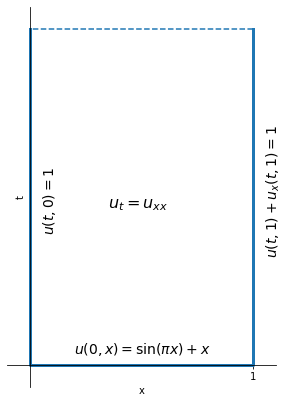

In [1]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(5, 7))
ax = fig.add_subplot(111)

ax.plot([0, 0, 1, 1], [1.5, 0, 0, 1.5], 'C0', linewidth=3)
ax.plot([1, 0], [1.5, 1.5], '--', c='C0')
ax.text(0.2, 0.05, r'$u(0,x) = \sin (\pi x) + x$', fontsize=14)
ax.text(0.05, 0.6, r'$u(t, 0) = 1$', rotation=90, fontsize=14)
ax.text(1.05, 0.5, r'$u(t, 1) + u_x(t,1)= 1$', rotation=90, fontsize=14)
ax.text(0.35, 0.7, r'$u_t = u_{xx}$', fontsize=16)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.6)

ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([1])
ax.set_yticks([])

plt.show()

First we have to transform the BCs to homogeneous ones. Looking at BCs, we could guess that we only need to translate $u$ by $+1$, i.e. $u = U + S = 1$ BC will become homogeneous for $U$. But we can follow the above procedure and get \\( A = B = 1 \\). Then \\( S = 1 - x/L + x/L = 1 \\). So our transformation is, as we expected,

\\[ u = U + S = U + 1 \\]

Substituting this in the original problem we get the transformed problem

\\[ \begin{aligned}
\text{PDE} \qquad & U_t = U_{xx} \\ \\
\text{BCs} \qquad & \begin{cases}
    U(t, 0) = 0 \\
    U(t, 1) + U_x(t, 1) = 0
\end{cases} \\ \\
\text{IC} \qquad & U(0, x) = \sin (\pi x)
\end{aligned} \\]

which we can now solve using separation of variables. We seek solutions of the form \\( U = X(x)T(t) \\) and substitute it into our PDE and divide both sides by \\( XT \\) to get **separated variables**:

\\[ \frac{T'}{T} = \frac{X''}{X} \\]

where LHS depends only on \\( t \\) and RHS on \\( x \\). Since \\( x, t \\) are independent of each other, each side must be a constant, say \\( \alpha \\). We get two ODEs:

\\[ T' - \alpha T = 0 \\ X'' - \alpha X = 0 \\]

Now notice that \\( \alpha \\) must be negative, i.e. \\( \alpha = - \lambda^2 \\) since then \\( T' = -\lambda^2 T \\) has the solution \\( T(t) = C \exp (-\lambda^2 t) \\) which decays with time, as it should (instead of growing to \\( \infty \\)). Then \\( X(x) = D \sin (\lambda x) + E \cos (\lambda x) \\) and multiplying them together:

\\[ U(x, t) = e^{-\lambda^2 t} \left[ D \sin (\lambda x) + E \cos (\lambda x) \right] \\]

where \\( D, E \\) are arbitrary constants (multiplying them by \\( C \\), another constant, doesn't matter). We now have infinitely many *simple* solutions to \\( u_t = u_{xx}\\). Solutions are simple because any temperature \\( u(x, t) \\) will have the same "shape" for any value of \\( t \\), but it exponentially decays with time.

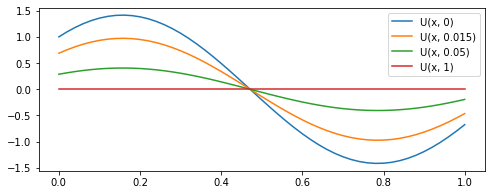

In [2]:
import numpy as np


xx = np.linspace(0, 1, 51)
tt = [0, 0.015, 0.05, 1]

fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot(111)

for t in tt:
    U = np.exp(-25*t) * (np.sin(5*xx) + np.cos(5*xx))
    ax.plot(xx, U, label=f'U(x, {t})')

ax.legend(loc='best')
plt.show()

However, as we can see from the figure above, not all of these solutions satisfy auxiliary conditions, but some of them do and we are only interested in the ones which do. So we substitute \\( U \\) in BCs:

\\[ U(t, 0) = E \ e^{- \lambda^2 t} = 0 \quad \Rightarrow \quad E = 0 \\
U(t, 1) + U_x(t, 1) =  D \ e^{- \lambda^2 t} ( \sin \lambda + \lambda \cos \lambda) = 0 \\]

where we choose \\( D \neq 0 \\) as we are interested in non-trivial solutions, so we have \\( \sin \lambda + \lambda \cos \lambda = 0 \\).

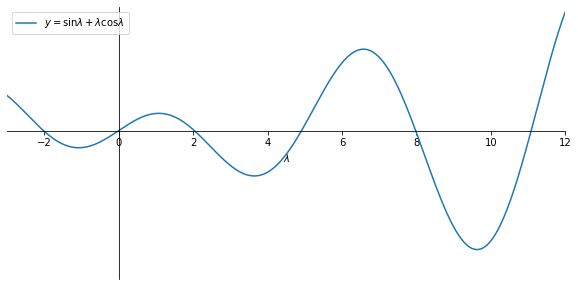

In [3]:
x = np.linspace(-4, 15, 501)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

ax.plot(x, np.sin(x) + x*np.cos(x), label=r'$y = \sin \lambda + \lambda \cos \lambda$')

ax.legend(loc='best')
ax.set_xlim(-3, 12)
ax.set_ylim(-12, 10)
ax.set_xlabel(r'$\lambda$')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_yticks([])
plt.show()

We have to find the roots numerically, which we do below.

In [4]:
# find roots of f(x) = sinx + x cosx = 0
    
from scipy.optimize import fsolve

def f(x): 
    return np.sin(x) + x*np.cos(x)

# the list are initial guesses which we approximate from the graphs above
lambdas = fsolve(f, [2, 5, 8, 11, 14])
for i in range(len(lambdas)):
    print(f'lambda {i+1} = {lambdas[i]}')

lambda 1 = 2.0287578379859226
lambda 2 = 4.913180439951472
lambda 3 = 7.978665712411702
lambda 4 = 11.085538406152708
lambda 5 = 14.207436725344412


Also note that we may only consider positive roots \\( \lambda \\) because \\( \sin \lambda + \lambda \cos \lambda = \sin (- \lambda) + (-\lambda) \cos (-\lambda) \\).

There are infinitely many roots \\( \lambda_i \\), which we call the **eigenvalues**, so we have infinitely many solutions

\\[ X_n (x) = D_n \sin ( \lambda_n x) \\
T_n (t) = e^{- \lambda_n^2 t} \\]

and multiplying them together we get the **eigenfunctions**:

\\[ U_n (x, t) = D_n e^{- \lambda_n^2 t} \sin ( \lambda_n x) \\]

Each one of these eigenfunctions satisfies the PDE and the BCs.

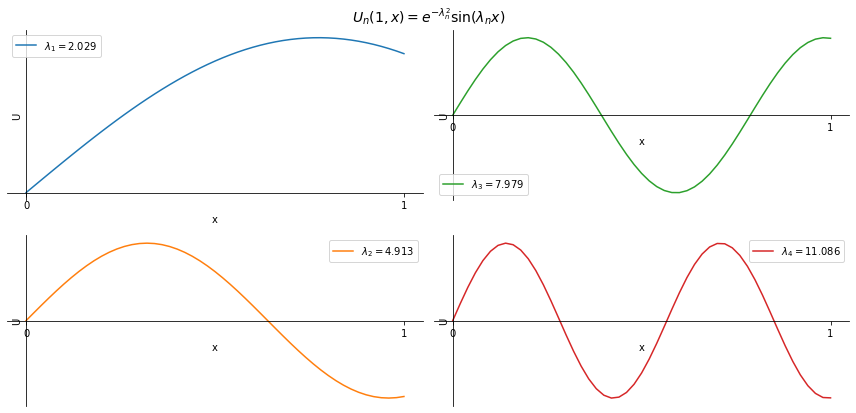

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
ax = ax.flatten(order='F')

for i, lam in enumerate(lambdas[:-1]):
    U = np.exp(-lam**2) * np.sin(lam*xx)
    ax[i].plot(xx, U, c=f'C{i}', label=fr'$\lambda_{i+1} = {lam:.3f}$')

    ax[i].legend(loc='best')
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('U')
    ax[i].spines['left'].set_position('zero')
    ax[i].spines['bottom'].set_position('zero')
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xticks([0, 1])
    ax[i].set_yticks([])
    
fig.suptitle(r'$U_n(1, x) = e^{-\lambda_n^2} \sin (\lambda_n x)$', fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

But we still need to satisfy the initial condition. Let us assume that we could do that by summing up all functions \\( U_n \\) (which we are allowed to do because of linearity). That is, consider a Fourier series of the eigenfunctions:

\\[ U(t, x) = \sum_{n=1}^\infty U_n = \sum_{n=1}^\infty D_n e^{- \lambda_n^2 t} \sin ( \lambda_n x) \\]

where we want to choose coefficients \\( D_n \\) such that the initial condition \\( U(0, x) = \sin(\pi x) \\) is satisfied:

\\[ U(0, x) = \sum_{n=1}^\infty D_n \sin ( \lambda_n x) = \sin (\pi x) \\]

To find the coefficients \\( D_n \\) we multiply both sides by \\( \sin (\lambda_n x) \\) and integrate from \\( 0 \\) to \\( 1 \\):

\\[  D_n \int_0^1 \sin^2 ( \lambda_n x) \ dx = \int_0^1 \sin (\pi x) \sin (\lambda_n x) \ dx \\]

and solve for \\( D_n \\):

\\[ D_n = \frac{\int_0^1 \sin (\pi x) \sin (\lambda_n x) \ dx}{\int_0^1 \sin^2 ( \lambda_n x) \ dx} \\]

D_1 = 0.81933447202856
D_2 = 0.4149624369818997
D_3 = -0.11413858717466217
D_4 = 0.054925619476512
D_5 = -0.03248712860366395
D_6 = 0.02150824645327097


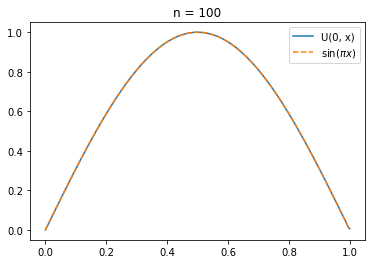

In [42]:
x = np.linspace(0, 1, 201)
x0 = [2 + k*np.pi for k in np.arange(100)]  # initial guesses

lambdas = fsolve(f, x0)

U = 0
for i, lam in enumerate(lambdas, 1):
    q1 = np.pi*np.sin(lam) / (np.pi**2 - lam**2)  # numerator
    q2 = 0.5 - np.sin(2*lam) / (4*lam)  # denominator
    D = q1/q2
    
    if i < 7:
        print(f'D_{i} = {D}')
    
    U += D*np.sin(lam*x)
    
plt.plot(x, U, label='U(0, x)')
plt.plot(x, np.sin(np.pi*x), '--', label=r'$\sin (\pi x)$')
plt.legend(loc='best')
plt.title('n = 100')
plt.show()

And now \\( U \\) satisfies the PDE, BCs and IC. So our solution \\(u = U + S \\) is

\\[ u(x, t) = 1 + \sum_{n=1}^\infty D_n e^{- \lambda_n^2 t} \sin ( \lambda_n x) \\]

where \\( \lambda_n \\) and \\( D_n \\) are given above.